In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

df = pd.read_csv('Fixed_cleaned_activities.csv')

# Convert timestamps and durations
df['Begin Timestamp'] = pd.to_datetime(df['Begin Timestamp'])
df['Quarter'] = df['Begin Timestamp'].dt.to_period('Q').dt.to_timestamp()

# Ensure duration is numeric
df['Duration (seconds)'] = pd.to_timedelta(df['Duration (h:m:s)']).dt.total_seconds()

# Group by quarter and calculate average values
quarterly_data = df.groupby('Quarter').agg({
    'Average Heart Rate (bpm)': 'mean',
    'Distance (Raw)': 'sum',
    'Average Speed': 'mean',
    'Calories': 'sum'
}).reset_index()

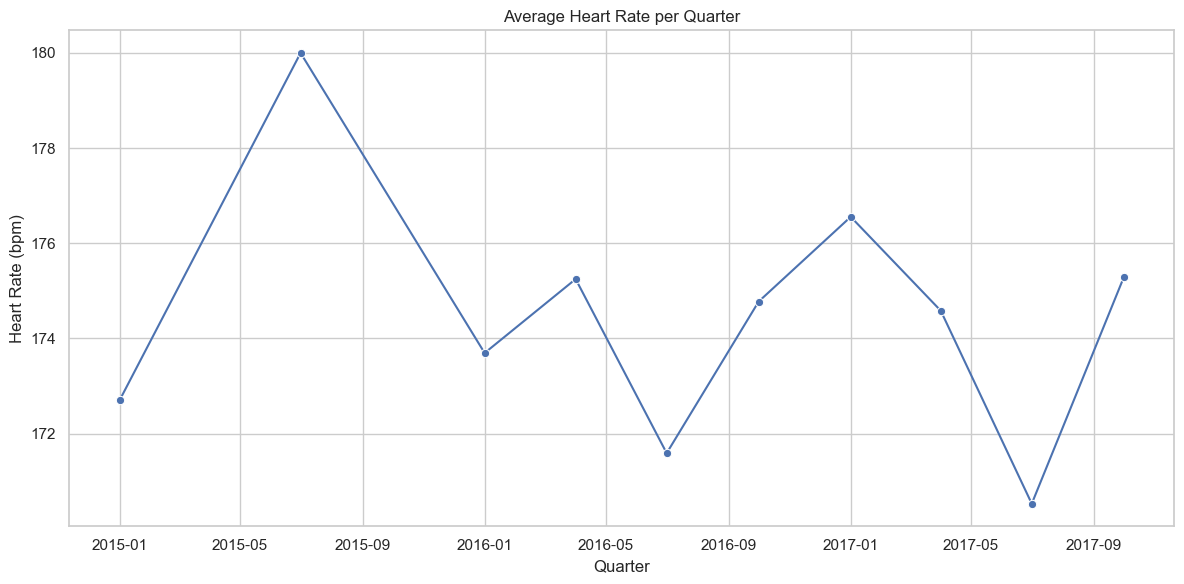

In [8]:
# Plot 1: Average Heart Rate by Quarter
sns.lineplot(data=quarterly_data, x='Quarter', y='Average Heart Rate (bpm)', marker='o')
plt.title('Average Heart Rate per Quarter')
plt.ylabel('Heart Rate (bpm)')
plt.xlabel('Quarter')
plt.tight_layout()
plt.show()

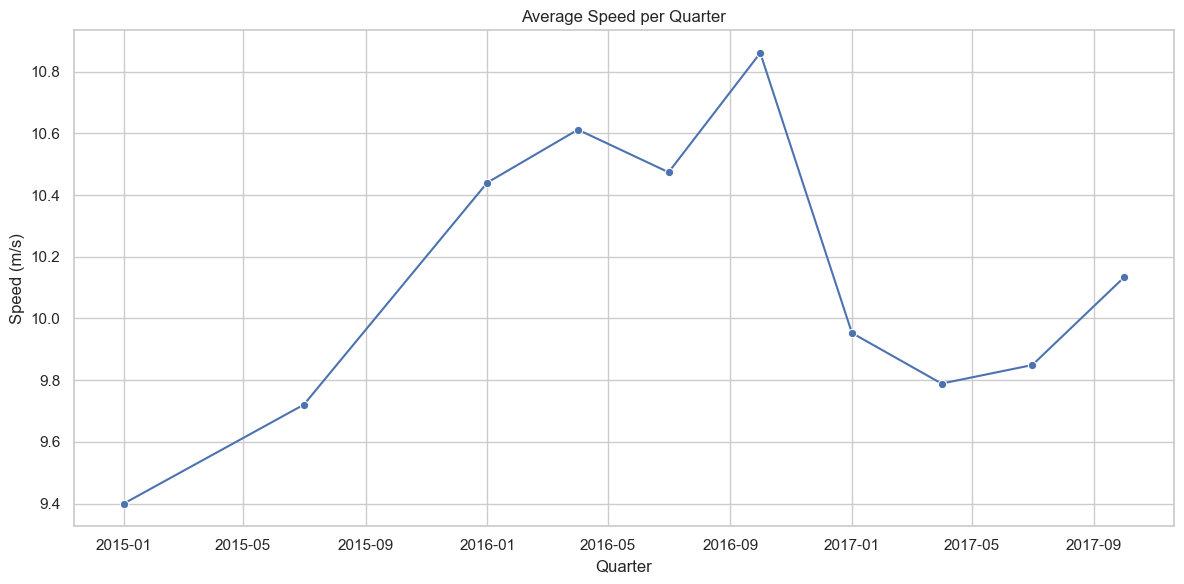

In [10]:
# Plot 2: Average Speed by Quarter
sns.lineplot(data=quarterly_data, x='Quarter', y='Average Speed', marker='o')
plt.title('Average Speed per Quarter')
plt.ylabel('Speed (m/s)')
plt.xlabel('Quarter')
plt.tight_layout()
plt.show()

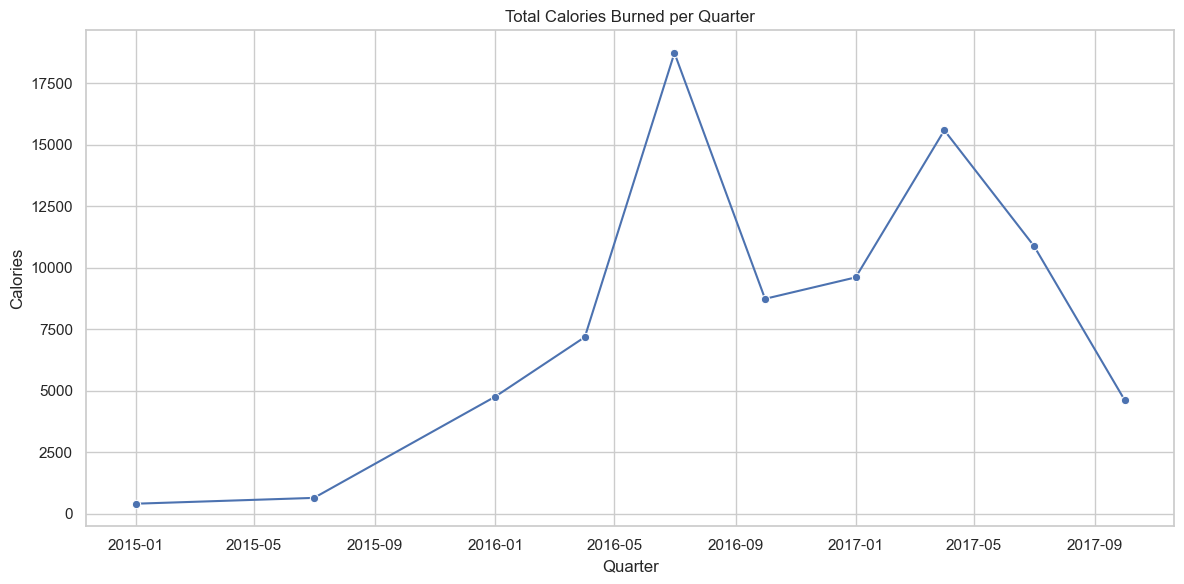

In [11]:
# Plot 3: Total Calories by Quarter
sns.lineplot(data=quarterly_data, x='Quarter', y='Calories', marker='o')
plt.title('Total Calories Burned per Quarter')
plt.ylabel('Calories')
plt.xlabel('Quarter')
plt.tight_layout()
plt.show()